In [2]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from mlr.MLR import MyLinearRegression as mlr
import numpy as np
import statsmodels.api as sm

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGE_ID = "Final_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", IMAGE_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
dataset1 = pd.read_csv('Final.csv')

dataset1 = dataset1.fillna(0)

In [4]:
print(dataset1[1:10])

dataset1.describe()

   Age   d180     d180N        L*       SST    Alkane   Alkanol  Sediment  \
1    1  3.228  1.161664 -2.252229  0.152172 -0.132815  0.741463  2.729549   
2    2  3.179  1.259892 -2.269439 -0.528866  0.155576  3.962484  2.729549   
3    3  3.286  1.045395 -2.469090 -1.572280  0.638307  6.194622  2.729549   
4    4  3.295  1.027353 -2.375546 -2.041553  1.278914  6.465403  2.729549   
5    5  3.264  1.089497 -2.357049 -2.345439  2.172727  5.651368  2.729549   
6    6  3.333  0.951177 -2.229444 -2.494080  2.973043  5.393774  2.729549   
7    7  3.367  0.883019 -2.348336 -2.306027  3.648344  4.780840  2.729549   
8    8  3.420  0.776772 -1.976850 -2.130118  4.176598  3.955021  2.729549   
9    9  3.385  0.846935 -2.680360 -2.061786  4.928875  3.564781  2.729549   

        Red     Green      Blue      Grey  
1 -0.524649 -1.095312 -1.330603 -0.954727  
2 -0.312894 -0.918423 -1.228388 -0.773885  
3 -0.375493 -1.005194 -1.279251 -0.850825  
4 -0.379937 -0.992837 -1.268917 -0.844385  
5 -0.4021

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment,Red,Green,Blue,Grey
count,1903.000000,1903.000000,1.903000e+03,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,1534.177614,3.807486,1.366267e-11,-0.290495,-0.352962,0.196626,0.308987,0.170414,0.009124,0.007043,0.006127,0.007615
std,1176.593587,0.498841,1.000000e+00,1.001075,1.045943,0.962319,0.986020,1.131473,0.496331,0.491195,0.490241,0.492846
min,0.000000,2.775000,-2.560963e+00,-2.902871,-2.494080,-1.439872,-2.748250,-2.025494,-3.238145,-3.037077,-2.752926,-3.075705
25%,475.500000,3.426000,-7.267121e-01,-1.059356,-1.436499,-0.282659,0.000000,-0.451596,0.000000,0.000000,0.000000,0.000000
50%,1302.000000,3.783000,4.908591e-02,-0.112870,0.000000,-0.031016,0.178058,-0.030568,0.000000,0.000000,0.000000,0.000000
75%,2441.500000,4.170000,7.647445e-01,0.501482,0.534591,0.463392,0.778891,0.320162,0.000000,0.000000,0.000000,0.000000
max,4260.000000,5.085000,2.069769e+00,1.585409,1.440398,5.710774,6.465403,4.233408,1.415121,1.448314,1.586844,1.412118


#MLR

In [5]:
X = dataset1.drop(columns = ['d180', 'd180N'])
y = dataset1.drop(columns = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment','Red','Green','Blue','Grey'])

In [6]:
(X.shape, y.shape)

((1903, 10), (1903, 1))

In [7]:
model = mlr()

In [8]:
model.ingest_data(X,y)

In [9]:
model.fit()

In [10]:
feature_cols = ['Age','L*','SST','Alkane','Alkanol','Sediment','Red','Green','Blue','Grey']
target_col = 'd180N'

In [11]:
model.fit_dataframe(X=feature_cols,y = target_col,dataframe=dataset1)

In [12]:
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  0.7651955960080801
Adjusted R-squared:  0.763954557932013
MSE:  0.23468101755057705


In [13]:
model.print_metrics()

sse:     446.5980
sst:     1902.0000
mse:     0.2347
r^2:     0.7652
adj_r^2: 0.7640
AIC:     2664.0282
BIC:     2725.0912


In [14]:
model.ingest_data(X,y)
model.corrcoef()

array([[ 1.        ,  0.59106693,  0.78996098, -0.57725777, -0.75117538,
        -0.36735032, -0.01542331, -0.00317219,  0.0052326 , -0.00598204],
       [ 0.59106693,  1.        ,  0.43602207, -0.54472637, -0.49863043,
        -0.11080573,  0.10437035,  0.13872795,  0.16169006,  0.13151253],
       [ 0.78996098,  0.43602207,  1.        , -0.65254766, -0.78118605,
        -0.32995302, -0.0587376 , -0.04715724, -0.04137046, -0.05025356],
       [-0.57725777, -0.54472637, -0.65254766,  1.        ,  0.74905577,
         0.01375459,  0.0287594 , -0.02322182, -0.06221859, -0.01205862],
       [-0.75117538, -0.49863043, -0.78118605,  0.74905577,  1.        ,
         0.31915915, -0.01443508, -0.06160272, -0.09642006, -0.05149194],
       [-0.36735032, -0.11080573, -0.32995302,  0.01375459,  0.31915915,
         1.        , -0.32253052, -0.28290518, -0.23747893, -0.29063786],
       [-0.01542331,  0.10437035, -0.0587376 ,  0.0287594 , -0.01443508,
        -0.32253052,  1.        ,  0.98902927

In [15]:
model.covar()

array([[ 1.38437247e+06,  6.96193067e+02,  9.72165131e+02,
        -6.53604863e+02, -8.71471890e+02, -4.89047669e+02,
        -9.00689500e+00, -1.83332543e+00,  3.01824148e+00,
        -3.46886079e+00],
       [ 6.96193067e+02,  1.00215089e+00,  4.56544334e-01,
        -5.24763922e-01, -4.92187864e-01, -1.25508482e-01,
         5.18578855e-02,  6.82157729e-02,  7.93523373e-02,
         6.48850900e-02],
       [ 9.72165131e+02,  4.56544334e-01,  1.09399628e+00,
        -6.56809114e-01, -8.05652872e-01, -3.90484970e-01,
        -3.04926563e-02, -2.42276085e-02, -2.12132952e-02,
        -2.59051432e-02],
       [-6.53604863e+02, -5.24763922e-01, -6.56809114e-01,
         9.26057651e-01,  7.10753034e-01,  1.49765255e-02,
         1.37363060e-02, -1.09766444e-02, -2.93527627e-02,
        -5.71910163e-03],
       [-8.71471890e+02, -4.92187864e-01, -8.05652872e-01,
         7.10753034e-01,  9.72234701e-01,  3.56071453e-01,
        -7.06440765e-03, -2.98359420e-02, -4.66082485e-02,
        -2.

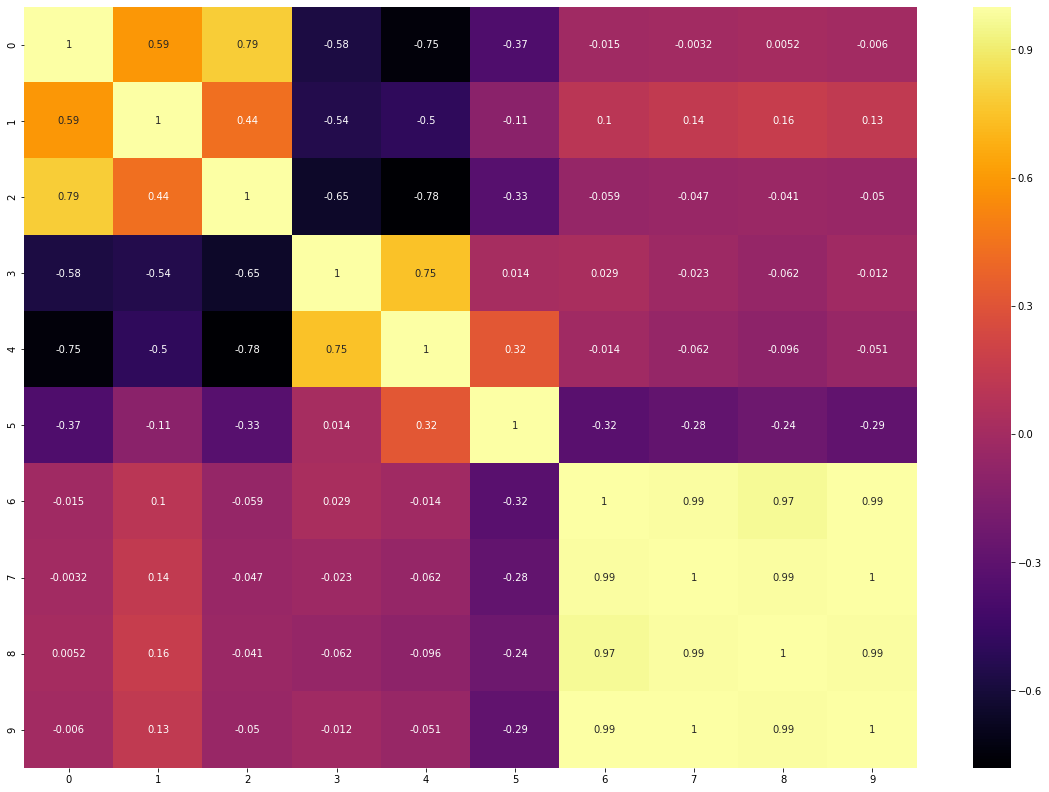

Saving figure mlr_corrplot


<Figure size 1440x1008 with 0 Axes>

In [17]:
plt.rcParams['figure.figsize'] = (20,14)
model.corrplot(cmap='inferno',annot=True)
save_fig('mlr_corrplot')

In [18]:
model.ftest()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(616.5770501038421, 0.0)

In [19]:
print("P-values:",model.pvalues())
print("t-test values:",model.tvalues())
print("Standard errors:",model.std_err())

P-values: const        5.918755e-17
Age          1.568802e-62
L*          1.021524e-251
SST          5.162945e-02
Alkane       1.809817e-01
Alkanol      2.395641e-01
Sediment     1.928090e-02
Red          3.316749e-01
Green        7.766184e-01
Blue         9.640089e-01
Grey         6.436922e-01
dtype: float64
t-test values: const       -8.445959
Age         17.325191
L*          39.749622
SST          1.947443
Alkane       1.338232
Alkanol      1.176448
Sediment    -2.342059
Red          0.970995
Green        0.283769
Blue         0.045129
Grey        -0.462617
dtype: float64
Standard errors: const        0.037825
Age          0.000019
L*           0.015182
SST          0.021070
Alkane       0.020296
Alkanol      0.025287
Sediment     0.013445
Red          3.554085
Green        6.804092
Blue         1.384906
Grey        11.669847
dtype: float64


In [20]:
model.conf_int()

,0,1
const,-0.393650,-0.245284
Age,0.000287,0.000360
L*,0.573709,0.633260
SST,-0.000290,0.082354
Alkane,-0.012644,0.066967
Alkanol,-0.019844,0.079342
Sediment,-0.057858,-0.005120
Red,-3.519339,10.421336
Green,-11.413521,15.275103
Blue,-2.653603,2.778603


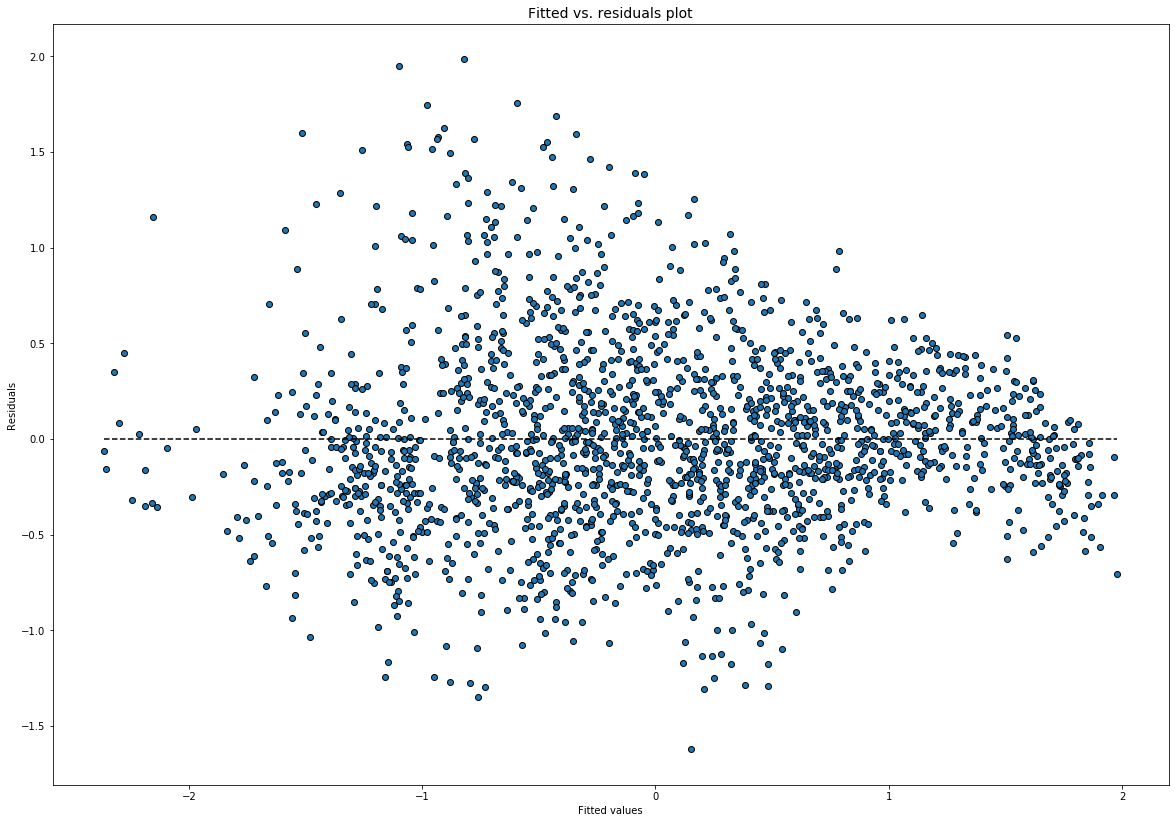

Saving figure mlr_fit_vs_resid


<Figure size 1440x1008 with 0 Axes>

In [23]:
model.fitted_vs_residual()
save_fig('mlr_fit_vs_resid')

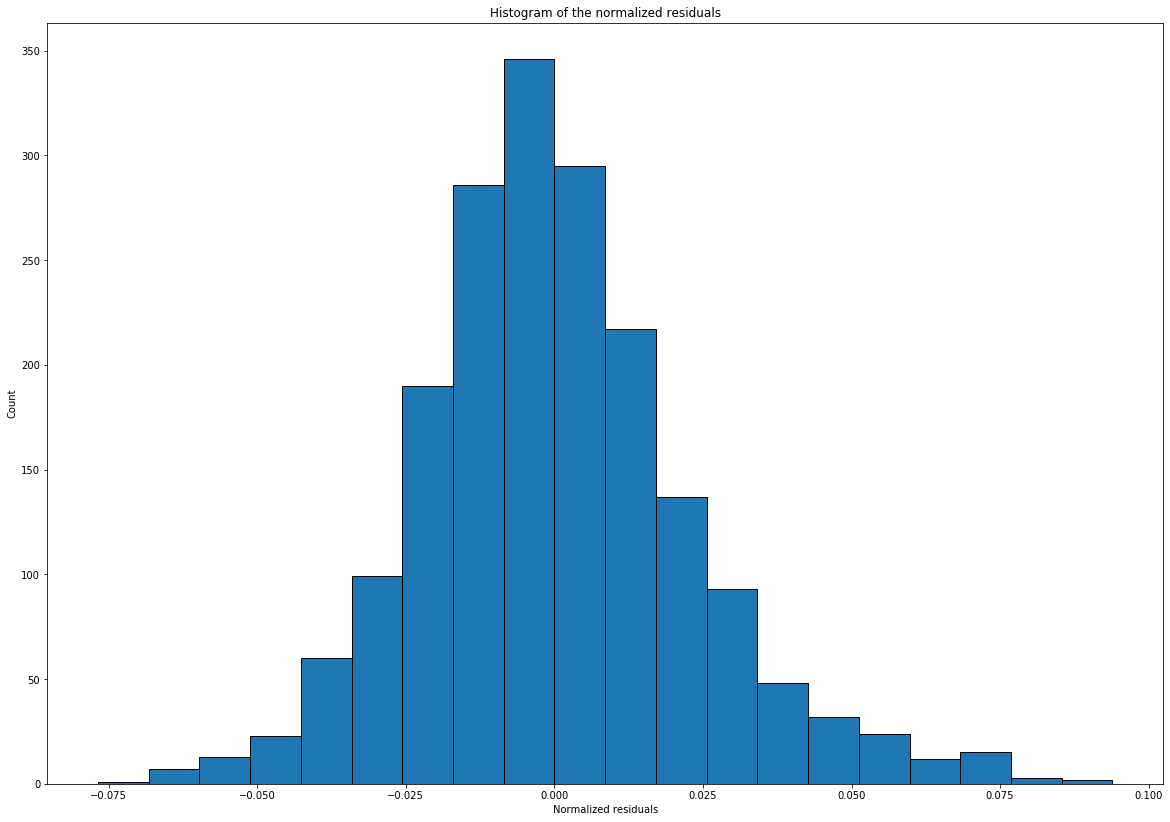

Saving figure mlr_norm_resid_hist


<Figure size 1440x1008 with 0 Axes>

In [24]:
model.histogram_resid()
save_fig('mlr_norm_resid_hist')

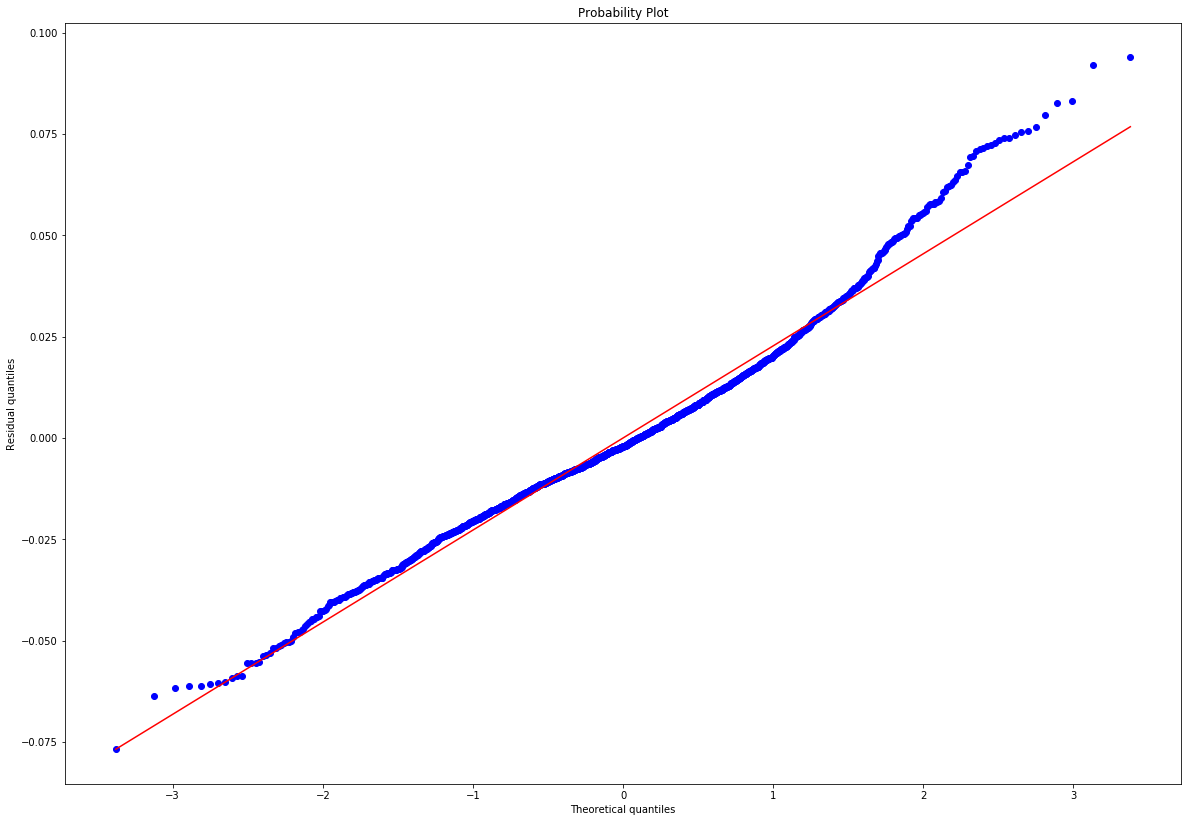

Saving figure mlr_qq_plot


<Figure size 1440x1008 with 0 Axes>

In [25]:
model.qqplot_resid()
save_fig('mlr_qq_plot')

In [26]:
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  d180N   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              587.6
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:41:44   Log-Likelihood:                         -1356.2
No. Observations:                1903   AIC:                                      2732.
Df Residuals:                    1893   BIC:                                      2788.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Parameters:  Age         0.000174
L*          0.662788
SST         0.120257
Alkane      0.049582
Alkanol    -0.034061
Sediment   -0.044337
Red         4.016647
Green       2.567891
Blue        0.186980
Grey       -6.746489
dtype: float64
Standard errors:  Age          0.000006
L*           0.013709
SST          0.019214
Alkane       0.020492
Alkanol      0.024576
Sediment     0.013605
Red          3.618866
Green        6.928916
Blue         1.410319
Grey        11.883554
dtype: float64
Predicted values:  [-0.33178442 -0.35484912 -0.4395551  ...  1.6820702   1.44817817
  1.62221388]
Saving figure mlr_pred_vs_actual_plot


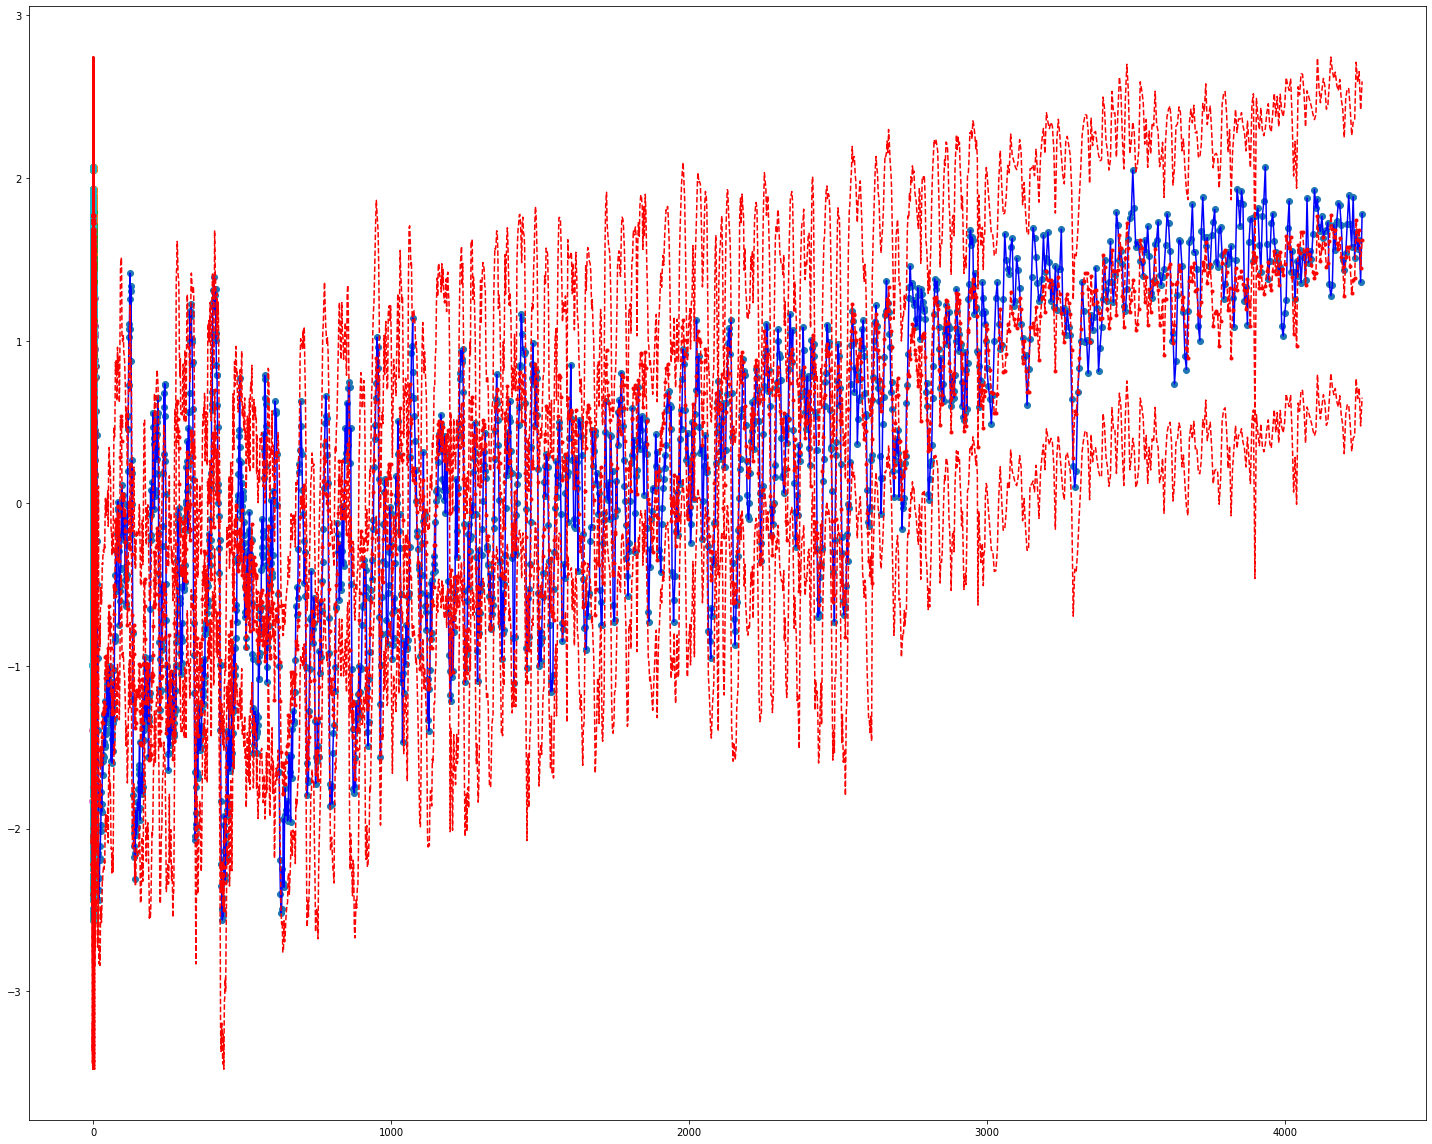

In [28]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(20,16))

ax.plot(X, y, 'o', label="data")
ax.plot(X, y, 'b-', label="True")
ax.plot(X, res.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
save_fig('mlr_pred_vs_actual_plot')

# Ridge Regression

In [29]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [30]:
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [31]:
rr = Ridge(alpha=0.1) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=25) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [32]:

print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

ridge regression train score low alpha: 0.7695408045091544
ridge regression test score low alpha: 0.7431713440108221
ridge regression train score high alpha: 0.7624181759897057
ridge regression test score high alpha: 0.7170634888902567


In [33]:
#cross-validation

from sklearn.model_selection import cross_val_score



scores_rr = cross_val_score(rr,X,y,cv = 10)

scores_rr100 = cross_val_score(rr100,X,y,cv = 100)


In [34]:


print ("ridge regression cv score low alpha:", scores_rr)
print ("ridge regression cv score high alpha:", scores_rr100)


print ("Average ridge regression cv score low alpha:", np.mean(scores_rr))
print ("Average ridge regression cv score high alpha:", np.mean(scores_rr100))

ridge regression cv score low alpha: [ 0.06693982  0.21705603  0.58762471  0.42531035  0.40298032  0.34610656
  0.2806144   0.62699544  0.21401708 -1.61797463]
ridge regression cv score high alpha: [-2.31977291e+00 -7.78348465e-01 -5.18332842e+00  2.53088144e-01
 -6.75841264e-01 -6.79784660e-01 -6.85072959e-02 -2.20396741e+01
 -4.40005636e+00 -5.64955844e-01 -1.53911296e+01  2.52166648e-01
 -6.80520186e-01 -1.74250894e+00 -5.16718287e-01 -3.31073143e-01
 -1.99419463e+00  5.41534188e-01 -3.30463282e+00 -3.18794022e+00
  1.22858016e-01 -4.32288839e+00  7.72058404e-01 -2.49901341e+00
 -7.25942118e+00 -4.84911409e-01  5.12697100e-02 -1.15258089e+00
 -4.51059195e+01 -2.11488764e-01 -1.06156452e+00 -2.70475193e+00
 -3.61271915e+00  5.80633743e-01  8.13112623e-01  8.07181341e-01
  6.96397434e-01 -4.57487016e-02  4.13981937e-01 -5.92104050e-01
  8.43398103e-01  3.52845536e-01 -5.48649171e-01  2.85532194e-01
  2.81372266e-01  7.36190597e-01 -1.39176332e-02 -2.84647946e-01
  6.07317882e-01 -1.29

Saving figure rr_coef_indx_vs_magn


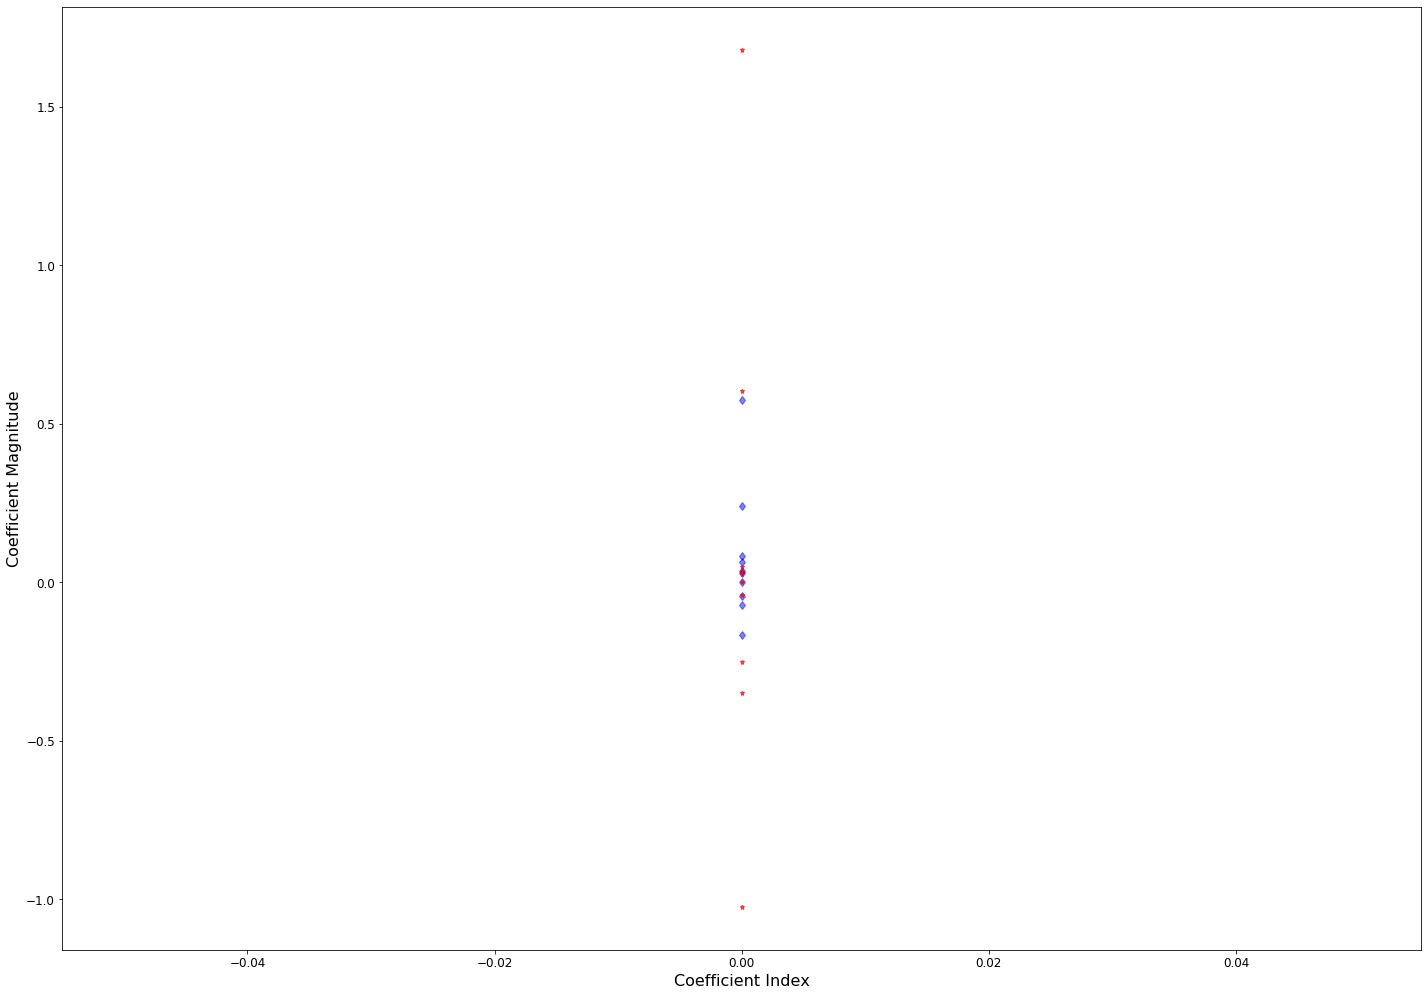

In [35]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
save_fig('rr_coef_indx_vs_magn')

#Multiple Output Regressor

#RFE

In [36]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl
from sklearn import metrics, model_selection


In [37]:
X = X
y = y
y_array = y.values
X.shape, y_array.shape

((1903, 10), (1903, 1))

In [38]:
model2 = LinearRegression()
rfe = RFE(model2, 5)
fit = rfe.fit(X,y_array.ravel())
print("Num Features: %d" %fit.n_features_)
print("Selected Features: %s" % fit.support_)
print ("Feature Ranking: %s" % fit.ranking_)
print ("Estimator: %s" % fit.estimator_)

Num Features: 5
Selected Features: [False  True False False False False  True  True  True  True]
Feature Ranking: [6 1 2 4 3 5 1 1 1 1]
Estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#PCA

In [39]:
dataset1.shape

(1903, 12)

In [40]:
X.shape, y.shape

((1903, 10), (1903, 1))

In [41]:
from sklearn.preprocessing import StandardScaler


In [42]:
scaler = StandardScaler()
scaler.fit(dataset1)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.transform(dataset1)[1:10])

[ 1.53417761e+03  3.80748607e+00  1.36626727e-11 -2.90495100e-01
 -3.52962149e-01  1.96625629e-01  3.08986973e-01  1.70413720e-01
  9.12422647e-03  7.04318267e-03  6.12745928e-03  7.61519167e-03]
[[-1.30340724 -1.16196977  1.16196977 -1.96014268  0.48307321 -0.34243062
   0.43872307  2.26236704 -1.07572135 -2.2448202  -2.72739491 -1.95313623]
 [-1.30255711 -1.26022324  1.26022324 -1.97733836 -0.16822162 -0.04266776
   3.70627212  2.26236704 -0.64896831 -1.88460591 -2.51884216 -1.5861052 ]
 [-1.30170697 -1.04566974  1.04566974 -2.17682767 -1.16606642  0.45909683
   5.97065384  2.26236704 -0.77512537 -2.06130384 -2.6226201  -1.74225974]
 [-1.30085684 -1.02762318  1.02762318 -2.08336002 -1.61484475  1.12496311
   6.24534639  2.26236704 -0.78408181 -2.03613987 -2.6015343  -1.72918997]
 [-1.30000671 -1.08978354  1.08978354 -2.06487742 -1.90545827  2.05401826
   5.41955277  2.26236704 -0.82890805 -2.06403208 -2.62523441 -1.76106576]
 [-1.29915657 -0.95142661  0.95142661 -1.93737648 -2.047608

In [43]:
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.transform(X)[1:10])

[ 1.53417761e+03 -2.90495100e-01 -3.52962149e-01  1.96625629e-01
  3.08986973e-01  1.70413720e-01  9.12422647e-03  7.04318267e-03
  6.12745928e-03  7.61519167e-03]
[[-1.30340724 -1.96014268  0.48307321 -0.34243062  0.43872307  2.26236704
  -1.07572135 -2.2448202  -2.72739491 -1.95313623]
 [-1.30255711 -1.97733836 -0.16822162 -0.04266776  3.70627212  2.26236704
  -0.64896831 -1.88460591 -2.51884216 -1.5861052 ]
 [-1.30170697 -2.17682767 -1.16606642  0.45909683  5.97065384  2.26236704
  -0.77512537 -2.06130384 -2.6226201  -1.74225974]
 [-1.30085684 -2.08336002 -1.61484475  1.12496311  6.24534639  2.26236704
  -0.78408181 -2.03613987 -2.6015343  -1.72918997]
 [-1.30000671 -2.06487742 -1.90545827  2.05401826  5.41955277  2.26236704
  -0.82890805 -2.06403208 -2.62523441 -1.76106576]
 [-1.29915657 -1.93737648 -2.04760806  2.88589019  5.15823756  2.26236704
  -0.79438566 -2.03580935 -2.65555619 -1.73767226]
 [-1.29830644 -2.05617135 -1.86776798  3.58781875  4.53644952  2.26236704
  -0.6651832

In [44]:
scaler = StandardScaler()
scaler.fit(y)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.transform(y)[1:10])

[1.36626727e-11]
[[1.16196977]
 [1.26022324]
 [1.04566974]
 [1.02762318]
 [1.08978354]
 [0.95142661]
 [0.88325074]
 [0.77697657]
 [0.84715762]]


In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [46]:
pca = PCA(whiten=True)
pca.fit(dataset1)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.99999656, 0.99999758, 0.99999846, 0.9999991 , 0.99999956,
       0.99999975, 0.99999988, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [47]:
pca = PCA(n_components=3,whiten=True)
pca = pca.fit(dataset1)
dataPCA = pca.transform(dataset1)

pca.components_

array([[ 9.99999012e-01, -3.11106469e-04,  6.23658332e-04,
         5.02894315e-04,  7.02242124e-04, -4.72130809e-04,
        -6.29506596e-04, -3.53262951e-04, -6.50602645e-06,
        -1.32419996e-06,  2.18032640e-06, -2.50562834e-06],
       [ 1.97280810e-04,  4.10474159e-02, -8.22855372e-02,
         2.96372150e-02,  3.36007310e-02, -2.13479069e-01,
        -3.76441603e-03,  7.85132506e-01, -3.04348824e-01,
        -2.84770373e-01, -2.64543762e-01, -2.89500393e-01],
       [ 9.91559021e-04,  1.99619034e-01, -4.00165494e-01,
        -6.01641947e-01, -1.03312411e-01,  4.54120198e-01,
         2.39665571e-01, -1.67419674e-01, -1.67094688e-01,
        -1.85932211e-01, -1.99549699e-01, -1.82665700e-01]])

In [48]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size=.20, random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_X)
# Apply transform to both the training set and the test set.
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [50]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [51]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lr.predict(test_X[0].reshape(1,-1))

array([[0.2862898]])

In [57]:
lr.predict(test_X[0:10])

array([[ 0.2862898 ],
       [-0.60024995],
       [-0.68966359],
       [-0.29224698],
       [ 1.4892893 ],
       [-0.44805471],
       [ 1.07580643],
       [-0.05508405],
       [-0.1564801 ],
       [-1.10089956]])

In [58]:
lr.score(test_X, test_y)

0.6988066716257664

fig, axes = plt.subplots(1,len(train_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(train_copy.columns):
  linear_regr_test.fit(train_copy[e].values[:,np.newaxis], y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('SalePrice')
  axes[i].scatter(train_copy[e].values[:,np.newaxis], y,color='g')
  axes[i].plot(train_copy[e].values[:,np.newaxis], 
  linear_regr_test.predict(train_copy[e].values[:,np.newaxis]),color='k')